In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.figure as figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')

## logistic regression.....
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
import re

In [3]:
df=pd.read_csv('zomato.csv')

In [4]:
df_1=df.copy()

In [5]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## BASIC EDA

## drop the columns.....

In [6]:
df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

## null value percentage...

In [7]:
df.isnull().sum()/df.shape[0]*100

address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

## null value remove....

In [8]:
df.shape

(51717, 14)

In [9]:
df.dropna(how="any",inplace=True)

In [10]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [11]:
df.reset_index(inplace=True)

In [12]:
df.drop('index',axis=1,inplace=True)

In [13]:
df.shape

(43533, 14)

In [14]:
### after null value remove we are getting 43533 observation...

## cost feature...

In [15]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [16]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace(',',''))


In [17]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float64')

## rest_type...

In [18]:
df['rest_type'].nunique()

87

In [19]:
df['rest_type']=df['rest_type'].str.lower()
df['rest_type']=df['rest_type'].str.replace(" ",'')

In [20]:
df['rest_type'].nunique()

87

In [21]:
#df[['rest_type_1','rest_type_2']]=df['rest_type'].str.split(',',expand=True)

In [22]:
#df['rest_type_1'].nunique()

In [23]:
#df['rest_type_2'].nunique()

## Rate...

In [24]:
df['rate']=df['rate'].apply(lambda x:str(x).split('/')[0])


In [25]:
#df['rate_1']=df['rate'].replace('_',None)

In [26]:
#df_1.shape

In [27]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [28]:
#df.shape

In [29]:
df=df.loc[df['rate']!='-']

In [30]:
df=df.loc[df['rate']!='NEW']

In [31]:
df.shape

(41263, 14)

In [32]:
df['rate']=df['rate'].astype('float64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 43532
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41263 non-null  object 
 1   name                         41263 non-null  object 
 2   online_order                 41263 non-null  object 
 3   book_table                   41263 non-null  object 
 4   rate                         41263 non-null  float64
 5   votes                        41263 non-null  int64  
 6   location                     41263 non-null  object 
 7   rest_type                    41263 non-null  object 
 8   cuisines                     41263 non-null  object 
 9   approx_cost(for two people)  41263 non-null  float64
 10  reviews_list                 41263 non-null  object 
 11  menu_item                    41263 non-null  object 
 12  listed_in(type)              41263 non-null  object 
 13  listed_in(city) 

## review...

In [34]:
#df_review=pd.DataFrame(df['reviews_list'].str.split(',',expand=True))

In [35]:
#x_review=df['reviews_list'].str.split(')',expand=True)

In [36]:
#x_review.shape

In [37]:
#np.arange(0,10)

In [38]:
#x_review.drop(x_review.columns[[np.arange(12,4536)]],axis=1)

In [39]:
#df[df.duplicated()]

## cuisines

In [40]:
df['cuisines'].nunique()

2367

In [41]:
#cuisies=df['cuisines'].str.split(',',expand=True)

In [42]:
#cuisies.isnull().sum()/cuisies.shape[0]*100

In [43]:
#cuisies.drop(columns=np.arange(3,8),inplace=True)

In [44]:
#cuisies

## online_order....

In [45]:
df['online_order'].replace(('Yes','No'),(1,0),inplace=True)
df['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
43528    0
43529    0
43530    0
43531    0
43532    0
Name: online_order, Length: 41263, dtype: int64

## book table....

In [46]:
df['book_table'].replace(('Yes','No'),(1,0),inplace=True)
df['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
43528    0
43529    0
43530    0
43531    1
43532    0
Name: book_table, Length: 41263, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 43532
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41263 non-null  object 
 1   name                         41263 non-null  object 
 2   online_order                 41263 non-null  int64  
 3   book_table                   41263 non-null  int64  
 4   rate                         41263 non-null  float64
 5   votes                        41263 non-null  int64  
 6   location                     41263 non-null  object 
 7   rest_type                    41263 non-null  object 
 8   cuisines                     41263 non-null  object 
 9   approx_cost(for two people)  41263 non-null  float64
 10  reviews_list                 41263 non-null  object 
 11  menu_item                    41263 non-null  object 
 12  listed_in(type)              41263 non-null  object 
 13  listed_in(city) 

## name......

In [48]:
df['name']=df.name.str.lower()

In [49]:
###################################

## factorize.....

In [50]:
df_fact=df.copy()
df_fact.shape

(41263, 14)

In [51]:
df.shape

(41263, 14)

### rest_type fact

In [52]:
df_fact.rest_type.nunique()

87

In [53]:
df_fact['rest_type']=df_fact['rest_type'].factorize()[0]
df_fact['rest_type']

0         0
1         0
2         1
3         2
4         0
         ..
43528    28
43529    28
43530    17
43531    17
43532    33
Name: rest_type, Length: 41263, dtype: int64

## #######

In [54]:
df_fact.address.nunique()

8792

In [55]:
df_fact.location.nunique()

92

### location...

In [56]:
df_fact['location']=df_fact['location'].factorize()[0]

In [57]:
df_fact.location.nunique()

92

## ##########

### listed_in fact

In [58]:
df_fact['listed_in(type)'].nunique()

7

In [59]:
df_fact['listed_in(city)'].nunique()

30

In [60]:
df_fact['listed_in(type)']=df_fact['listed_in(type)'].factorize()[0]
df_fact['listed_in(city)']=df_fact['listed_in(city)'].factorize()[0]

### cuisines fact

In [61]:
df_fact.cuisines.nunique()

2367

In [62]:
df_fact['cuisines']=df_fact['cuisines'].factorize()[0]

### menu item fact....

In [63]:
#df_fact.shape

In [64]:
#df_fact['menu_item']=df_fact['menu_item'].str.lower()

In [65]:
#df_fact['menu_item'].nunique()

In [66]:
#df_fact['menu_item']=df_fact['menu_item'].factorize()[0]

In [67]:
#df_fact['menu_item'].unique()

In [68]:
df_fact.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,1,1,4.1,775,0,0,0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,1,0,4.1,787,0,0,1,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,0
2,"1112, Next to KIMS Medical College, 17th Cross...",san churro cafe,1,0,3.8,918,0,1,2,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",addhuri udupi bhojana,0,0,3.7,88,0,2,3,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",grand village,0,0,3.8,166,1,0,4,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0,0


## correlation......

<AxesSubplot:>

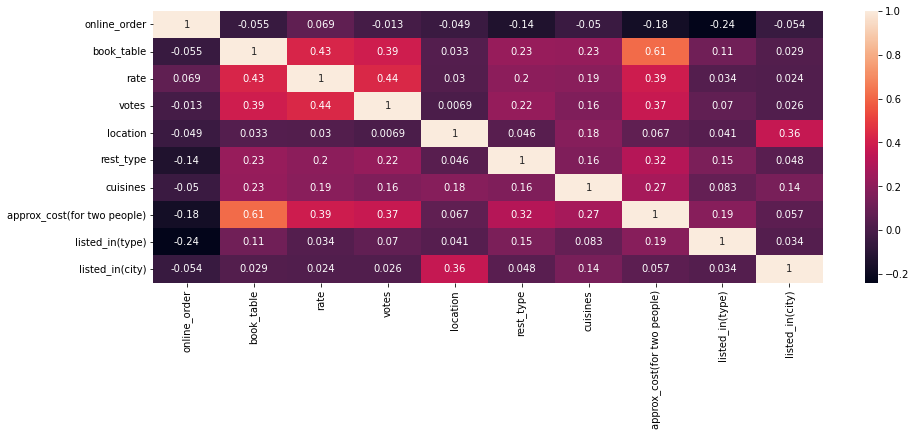

In [69]:
plt.figure(figsize=(15,5))

sns.heatmap(df_fact.corr(),annot=True)

<AxesSubplot:>

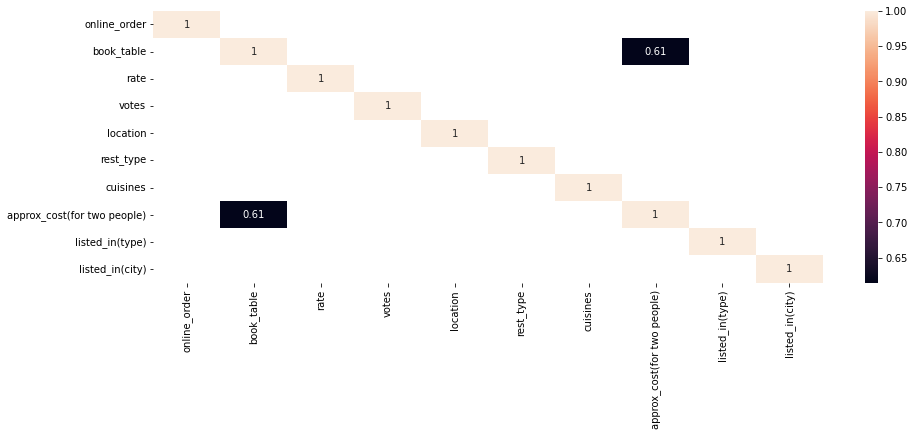

In [70]:
plt.figure(figsize=(15,5))

sns.heatmap(df_fact.corr()[np.abs(df_fact.corr()>0.6)],annot=True)

In [71]:
df_fact=df_fact.reset_index()

In [72]:
df_fact.drop('index',axis=1,inplace=True)

In [73]:
df_num=df_fact.select_dtypes(np.number)
df_cat=df_fact.select_dtypes(object)

## full OLS model....

In [74]:
x_full=df_fact.drop(['address','name','reviews_list','approx_cost(for two people)','menu_item'],axis=1)
y_full=df_fact['approx_cost(for two people)']

xc_full=sm.add_constant(x_full)

x_train_full,x_test_full,y_train_full,y_test_full=train_test_split(x_full,y_full,test_size=0.3,random_state=123)

print('x-train: ',x_train_full.shape)
print('y-train: ',y_train_full.shape)
print('x-test: ',x_test_full.shape)
print('y-test: ',y_test_full.shape)

x-train:  (28884, 9)
y-train:  (28884,)
x-test:  (12379, 9)
y-test:  (12379,)


In [75]:
#x_dummy=df_fact.drop(['address','name','reviews_list','approx_cost(for two people)','menu_item'],axis=1)
#y_dummy=df_fact['approx_cost(for two people)']

#------------------------------------------------------------------------xc_full=sm.add_constant(x_full)

#x_train_dummy,x_test_dummy,y_train_dummy,y_test_dummy=train_test_split(x_dummy,y_dummy,test_size=0.3,random_state=123)

#print('x-train: ',x_train_dummy.shape)
#print('y-train: ',y_train_dummy.shape)
#print('x-test: ',x_test_dummy.shape)
#print('y-test: ',y_test_dummy.shape)

In [76]:
#model_dummy=sm.OLS(y_train_dummy,x_train_dummy).fit()
#model_dummy.summary()

In [77]:
#y_test_pred_dummy=model_full.predict(x_test_dummy)
#y_train_pred_dummy=model_full.predict(x_train_dummy)

#r2score_train_dummy=r2_score(y_train_dummy,y_train_pred_dummy)
#r2score_test_dummy=r2_score(y_test_dummy,y_test_pred_dummy)

#r2score_train_dummy

### VIF

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif_value=[VIF(xc_full.values,i) for i in range (xc_full.shape[1])]
pd.DataFrame(vif_value,columns=['VIF_VALUE'],index=xc_full.columns).sort_values('VIF_VALUE',ascending=False)

,VIF_VALUE
const,103.538533
rate,1.398389
book_table,1.363041
votes,1.341525
location,1.175093
listed_in(city),1.161038
rest_type,1.124214
cuisines,1.120728
online_order,1.090191
listed_in(type),1.085869


In [79]:
model_full=sm.OLS(y_train_full,x_train_full).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared (uncentered):                   0.804
Model:                                     OLS   Adj. R-squared (uncentered):              0.804
Method:                          Least Squares   F-statistic:                          1.315e+04
Date:                         Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                                 15:58:53   Log-Likelihood:                     -2.0894e+05
No. Observations:                        28884   AIC:                                  4.179e+05
Df Residuals:                            28875   BIC:                                  4.180e+05
Df Model:                                    9                                                  
Covariance Type:                     nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
online_order     -113.7423      4.312    -26.376      0.000    -122.195    -105.290
book_table        599.3485      6.170     97.134      0.000     587.254     611.443
rate              112.7347      2.025     55.663      0.000     108.765     116.704
votes               0.0462      0.002     19.034      0.000       0.041       0.051
location            0.3557      0.105      3.373      0.001       0.149       0.562
rest_type           4.5996      0.169     27.253      0.000       4.269       4.930
cuisines            0.0768      0.004     21.125      0.000       0.070       0.084
listed_in(type)    23.3424      1.697     13.755      0.000      20.016      26.669
listed_in(city)     0.0892      0.263      0.339      0.735      -0.427       0.605
==============================================================================
Omnibus:                    15056.158   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178962.851
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                      14.339   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
y_test_pred_full=model_full.predict(x_test_full)
y_train_pred_full=model_full.predict(x_train_full)

#r2score_train_LR=r2_score(y_train_LR,y_train_pred_LR)
#r2score_test_LR=r2_score(y_test_LR,y_test_pred_LR)

#print(r2score_train_LR)
#print(r2score_test_LR)

mse_train_full=mean_squared_error(y_train_full,y_train_pred_full)
mse_test_full=mean_squared_error(y_test_full,y_test_pred_full)

rmse_train_full=np.sqrt(mse_train_full)
rmse_test_full=np.sqrt(mse_test_full)

print(rmse_train_full)
print(rmse_test_full)

full_model=['full_model',rmse_train_full,rmse_test_full]
full_model

335.1756272651971
354.8432110459481


['full_model', 335.1756272651971, 354.8432110459481]

## multicolinearity.....

<AxesSubplot:>

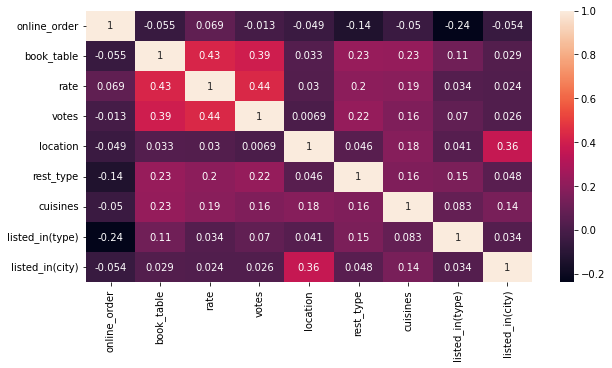

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(x_full.corr(),annot=True)

## scaled model....

In [82]:
df_scale=df_fact.copy()

In [83]:
df_scale.loc[:,['location','rest_type','cuisines','listed_in(type)','listed_in(city)','votes']]=df_scale.loc[:,['location','rest_type','cuisines','listed_in(type)','listed_in(city)','votes']].apply(lambda x:(x-(x.mean()))/x.std())

In [84]:
x_scale=df_scale.drop(['address','name','reviews_list','approx_cost(for two people)','menu_item'],axis=1)
y_scale=df_scale['approx_cost(for two people)']

xc_scale=sm.add_constant(x_full)

x_train_scale,x_test_scale,y_train_scale,y_test_scale=train_test_split(x_scale,y_scale,test_size=0.3,random_state=123)

print('x-train: ',x_train_scale.shape)
print('y-train: ',y_train_scale.shape)
print('x-test: ',x_test_scale.shape)
print('y-test: ',y_test_scale.shape)

x-train:  (28884, 9)
y-train:  (28884,)
x-test:  (12379, 9)
y-test:  (12379,)


In [85]:
model_scale=sm.OLS(y_train_scale,x_train_scale).fit()
model_scale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared (uncentered):                   0.803
Model:                                     OLS   Adj. R-squared (uncentered):              0.803
Method:                          Least Squares   F-statistic:                          1.311e+04
Date:                         Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                                 15:58:55   Log-Likelihood:                     -2.0897e+05
No. Observations:                        28884   AIC:                                  4.180e+05
Df Residuals:                            28875   BIC:                                  4.180e+05
Df Model:                                    9                                                  
Covariance Type:                     nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
online_order     -112.2395      4.340    -25.859      0.000    -120.747    -103.732
book_table        586.1629      6.233     94.042      0.000     573.946     598.380
rate              158.2403      0.983    160.958      0.000     156.313     160.167
votes              34.7119      2.121     16.364      0.000      30.554      38.870
location            7.0985      2.149      3.303      0.001       2.887      11.310
rest_type          55.9594      2.101     26.639      0.000      51.842      60.077
cuisines           42.8244      2.095     20.443      0.000      38.719      46.930
listed_in(type)    28.2177      2.066     13.659      0.000      24.169      32.267
listed_in(city)     1.0134      2.125      0.477      0.634      -3.153       5.179
==============================================================================
Omnibus:                    14785.257   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169823.540
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      14.032   Cond. No.                         12.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
y_test_pred_scale=model_scale.predict(x_test_scale)
y_train_pred_scale=model_scale.predict(x_train_scale)

#r2score_train_LR=r2_score(y_train_LR,y_train_pred_LR)
#r2score_test_LR=r2_score(y_test_LR,y_test_pred_LR)

#print(r2score_train_LR)
#print(r2score_test_LR)

mse_train_scale=mean_squared_error(y_train_scale,y_train_pred_scale)
mse_test_scale=mean_squared_error(y_test_scale,y_test_pred_scale)

rmse_train_scale=np.sqrt(mse_train_scale)
rmse_test_scale=np.sqrt(mse_test_scale)

print(rmse_train_scale)
print(rmse_test_scale)

scale_model=['scale_model',rmse_train_full,rmse_test_full]
scale_model

335.59338523484837
355.0229740059223


['scale_model', 335.1756272651971, 354.8432110459481]

## Linear regression......

In [87]:
x_LR=df_scale.drop(['address','name','reviews_list','approx_cost(for two people)','menu_item'],axis=1)
y_LR=df_scale['approx_cost(for two people)']

x_train_LR,x_test_LR,y_train_LR,y_test_LR=train_test_split(x_LR,y_LR,test_size=0.3,random_state=123)

print('x-train: ',x_train_LR.shape)
print('y-train: ',y_train_LR.shape)
print('x-test: ',x_test_LR.shape)
print('y-test: ',y_test_LR.shape)

x-train:  (28884, 9)
y-train:  (28884,)
x-test:  (12379, 9)
y-test:  (12379,)


In [88]:
LR=LinearRegression()

LR.fit(x_train_LR,y_train_LR)
y_test_pred_LR=LR.predict(x_test_LR)
y_train_pred_LR=LR.predict(x_train_LR)

r2score_train_LR=r2_score(y_train_LR,y_train_pred_LR)
r2score_test_LR=r2_score(y_test_LR,y_test_pred_LR)

print(r2score_train_LR)
print(r2score_test_LR)

mse_train_LR=mean_squared_error(y_train_LR,y_train_pred_LR)
mse_test_LR=mean_squared_error(y_test_LR,y_test_pred_LR)

rmse_train_LR=np.sqrt(mse_train_LR)
rmse_test_LR=np.sqrt(mse_test_LR)

print(rmse_train_LR)
print(rmse_test_LR)

LR_model=['LR_model',rmse_train_LR,rmse_test_LR]
LR_model

0.4640267424273292
0.4560563771444657
335.1750915789326
354.83010682522837


['LR_model', 335.1750915789326, 354.83010682522837]

## forward.....

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [90]:
lr=LinearRegression()
lr_sfs=SFS(estimator=lr,k_features='best',forward=True)

lr_ford=lr_sfs.fit(x_train_full,y_train_full)

forward_feature=list(lr_ford.k_feature_names_)
forward_feature

['online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'listed_in(type)']

In [91]:
lr=LinearRegression()
lr.fit(x_train_full[forward_feature],y_train_full)

y_train_pred=lr.predict(x_train_full[forward_feature])
y_test_pred=lr.predict(x_test_full[forward_feature])

#r2_train=r2_score(y_train_scale,y_train_pred)
#r2_test=r2_score(y_test_scale,y_test_pred)

mse_train=mean_squared_error(y_train_full,y_train_pred)
mse_test=mean_squared_error(y_test_full,y_test_pred)

rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

result_sfs=['forward_model',rmse_train,rmse_test]
result_sfs

['forward_model', 335.17592119890196, 354.83965170317634]

## backward....

In [92]:
lr=LinearRegression()
lr_sfs=SFS(estimator=lr,k_features='best',forward=False)

lr_ford=lr_sfs.fit(x_train_full,y_train_full)

back_feature=list(lr_ford.k_feature_names_)
back_feature

['online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'listed_in(type)']

In [93]:
lr=LinearRegression()
lr.fit(x_train_full[back_feature],y_train_full)

y_train_pred=lr.predict(x_train_full[back_feature])
y_test_pred=lr.predict(x_test_full[back_feature])

#r2_train=r2_score(y_train_scale,y_train_pred)
#r2_test=r2_score(y_test_scale,y_test_pred)

mse_train=mean_squared_error(y_train_full,y_train_pred)
mse_test=mean_squared_error(y_test_full,y_test_pred)

rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

result_sfs_back=['backward_model',rmse_train,rmse_test]
result_sfs_back

['backward_model', 335.17592119890196, 354.83965170317634]

## ridge

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNetCV,ElasticNet

In [95]:
param={'alpha':[0.01,0.01,0.1,0.3,0.5]}

model=Ridge(normalize=True)

grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(x_train_scale,y_train_scale)
grid_cv.best_params_

{'alpha': 0.01}

In [96]:
ridge_model=Ridge(alpha=0.01,normalize=True)
ridge_model.fit(x_train_full,y_train_full)

y_pred_train = ridge_model.predict(x_train_full)
y_pred_test = ridge_model.predict(x_test_full)


#train_r2 = r2_score(y_train_full, y_pred_train)
#test_r2 = r2_score(y_test_full, y_pred_test)
#print('Train R2 ', train_r2)
#print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train_full, y_pred_train)
test_mse = mean_squared_error(y_test_full, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test rmse ", test_rmse)

result_ridge = ['Ridge  ', train_rmse, test_rmse]
result_ridge

train RMSE  335.1825670105923
test rmse  354.9110494749371


['Ridge  ', 335.1825670105923, 354.9110494749371]

## Lasso...

In [97]:
param={'alpha':[0.01,0.01,0.1,0.3,0.5]}

model=Lasso(normalize=True)

grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(x_train_full,y_train_full)
grid_cv.best_params_

{'alpha': 0.01}

In [98]:
lasso_model=Lasso(alpha=0.01,normalize=True)
lasso_model.fit(x_train_full,y_train_full)

y_pred_train = lasso_model.predict(x_train_full)
y_pred_test = lasso_model.predict(x_test_full)


#train_r2 = r2_score(y_train_full, y_pred_train)
#test_r2 = r2_score(y_test_full, y_pred_test)
#print('Train R2 ', train_r2)
#print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train_full, y_pred_train)
test_mse = mean_squared_error(y_test_full, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test rmse ", test_rmse)

result_lasso = ['Lasso ', train_rmse, test_rmse]
result_lasso

train RMSE  335.1943984987931
test rmse  354.99357413703416


['Lasso ', 335.1943984987931, 354.99357413703416]

## Elastinate....

In [99]:
param={'alpha':[0.01,0.01,0.1,0.3,0.5],
      'l1_ratio':[0.3,0.5,0.7]}

algo_name=ElasticNet(normalize=True)

grid_cv=GridSearchCV(estimator=algo_name,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(x_train_full,y_train_full)
grid_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.7}

In [100]:
en_model=ElasticNet(alpha=0.01,l1_ratio=0.7,normalize=True)
en_model.fit(x_train_scale,y_train_scale)

y_pred_train = en_model.predict(x_train_full)
y_pred_test = en_model.predict(x_test_full)


#train_r2 = r2_score(y_train_scale, y_pred_train)
#test_r2 = r2_score(y_test_scale, y_pred_test)
#print('Train R2 ', train_r2)
#print('Test R2  ', test_r2)

train_mse = mean_squared_error(y_train_full, y_pred_train)
test_mse = mean_squared_error(y_test_full, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("train RMSE ", train_rmse)
print("test rmse ", test_rmse)

result_en = ['ElasticNet ', train_rmse, test_rmse]
result_en

train RMSE  2296.084711868724
test rmse  2207.149919755632


['ElasticNet ', 2296.084711868724, 2207.149919755632]

## SGD regression....

In [101]:
from sklearn.linear_model import SGDClassifier,SGDRegressor

In [102]:
sgd = SGDRegressor(random_state = 100)


linreg_with_SGD = sgd.fit(x_train_full, y_train_full)

y_pred_train=linreg_with_SGD.predict(x_train_scale)
y_pred_test=linreg_with_SGD.predict(x_test_scale)

mse_train=mean_squared_error(y_train_full,y_pred_train)
train_rmse=round(np.sqrt(mse_train),4)

mse_test=mean_squared_error(y_test_full,y_pred_test)
test_rmse=round(np.sqrt(mse_test),4)

result_sgd = ['SGD regression ', train_rmse, test_rmse]
print(result_sgd)
print(train_rmse)

['SGD regression ', 1741372463935.416, 1639445451172.7405]
1741372463935.416


## models summarization....

In [103]:
results = pd.DataFrame(columns=['Method', 'Train RMSE', 'Test RMSE'])
results.loc[len(results)] = full_model
results.loc[len(results)] = scale_model
results.loc[len(results)] = LR_model
results.loc[len(results)] = result_sfs
results.loc[len(results)] = result_sfs_back
results.loc[len(results)] = result_ridge
results.loc[len(results)] = result_lasso
results.loc[len(results)] = result_en


#results.loc[len(results)] = result_sgd
results

,Method,Train RMSE,Test RMSE
0,full_model,335.175627,354.843211
1,scale_model,335.175627,354.843211
2,LR_model,335.175092,354.830107
3,forward_model,335.175921,354.839652
4,backward_model,335.175921,354.839652
5,Ridge,335.182567,354.911049
6,Lasso,335.194398,354.993574
7,ElasticNet,2296.084712,2207.149920


In [104]:
results_1=results.copy()

In [105]:
result_num=results_1.select_dtypes(np.number)

In [106]:
# standrlize the error......
result_num.apply(lambda x: (x-x.mean())/x.std())

,Train RMSE,Test RMSE
0,-0.353559,-0.353597
1,-0.353559,-0.353597
2,-0.353559,-0.353617
3,-0.353558,-0.353602
4,-0.353558,-0.353602
5,-0.353549,-0.353493
6,-0.353532,-0.353367
7,2.474874,2.474874


In [107]:
result_num['different']=np.abs(result_num['Train RMSE']-result_num['Test RMSE'])
result_num

,Train RMSE,Test RMSE,different
0,335.175627,354.843211,19.667584
1,335.175627,354.843211,19.667584
2,335.175092,354.830107,19.655015
3,335.175921,354.839652,19.663731
4,335.175921,354.839652,19.663731
5,335.182567,354.911049,19.728482
6,335.194398,354.993574,19.799176
7,2296.084712,2207.149920,88.934792


In [108]:
results['Standard_Diff']=result_num['different']
results.sort_values(by='Standard_Diff',ascending=True)

,Method,Train RMSE,Test RMSE,Standard_Diff
2,LR_model,335.175092,354.830107,19.655015
3,forward_model,335.175921,354.839652,19.663731
4,backward_model,335.175921,354.839652,19.663731
0,full_model,335.175627,354.843211,19.667584
1,scale_model,335.175627,354.843211,19.667584
5,Ridge,335.182567,354.911049,19.728482
6,Lasso,335.194398,354.993574,19.799176
7,ElasticNet,2296.084712,2207.149920,88.934792


# SECTION:B ( ORDER STATUS ANALYSIS )

In [109]:
df_fact_1=df_fact.copy()

Text(0.5, 1.0, '1: online order / 0: offline order')

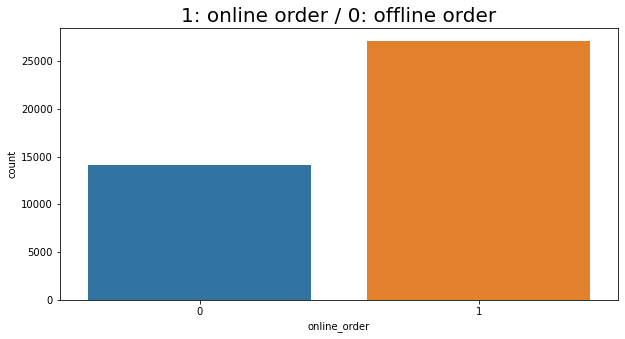

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(df_fact_1.online_order)
plt.title('1: online order / 0: offline order',fontsize=20)

In [111]:
df_fact_1.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,1,1,4.1,775,0,0,0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,0


## FULL MODEL

In [112]:
xb_1=df_fact_1.drop(['address','name','online_order','reviews_list','menu_item'],axis=1)
yb_1=df_fact_1['online_order']

xbc_1=sm.add_constant(xb_1)

x_train_logit,x_test_logit,y_train_logit,y_test_logit=train_test_split(xbc_1,yb_1,test_size=0.3,random_state=100)

print('x_train: ',x_train_logit.shape)
print('x_test: ',x_test_logit.shape)
print('y_train: ',y_train_logit.shape)
print('y_test: ',y_test_logit.shape)

x_train:  (28884, 10)
x_test:  (12379, 10)
y_train:  (28884,)
y_test:  (12379,)


In [113]:
model_logit=sm.Logit(y_train_logit,x_train_logit).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.591474
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           online_order   No. Observations:                28884
Model:                          Logit   Df Residuals:                    28874
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.08020
Time:                        15:59:06   Log-Likelihood:                -17084.
converged:                       True   LL-Null:                       -18574.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1462      0.130     -1.126      0.260      -0.401       0.108
book_table                      0.2880      0.050      5.733      0.000       0.190       0.386
rate                            0.7415      0.035     21.137      0.000       0.673       0.810
votes                        3.999e-05   1.84e-05      2.168      0.030    3.84e-06    7.61e-05
location                       -0.0026      0.001     -3.783      0.000      -0.004      -0.001
rest_type                      -0.0152      0.001    -13.849      0.000      -0.017      -0.013
cuisines                     2.598e-05   2.41e-05      1.077      0.282   -2.13e-05    7.33e-05
approx_cost(for two people)    -0.0010   4.11e-05    -23.276      0.000      -0.001      -0.001
listed_in(type)                -0.3803      0.012    -32.829      0.000      -0.403      -0.358
listed_in(city)                -0.0087      0.002     -4.955      0.000      -0.012      -0.005
===============================================================================================
"""

In [114]:
odd=np.exp(model_logit.params)
odd

const                          0.863960
book_table                     1.333762
rate                           2.099005
votes                          1.000040
location                       0.997386
rest_type                      0.984870
cuisines                       1.000026
approx_cost(for two people)    0.999044
listed_in(type)                0.683666
listed_in(city)                0.991361
dtype: float64

In [115]:
y_pred_prob_logit=model_logit.predict(x_test_logit)
y_pred_prob_logit

31366    0.557727
1151     0.733435
15284    0.336231
18368    0.617611
5343     0.312727
           ...   
9831     0.840876
11617    0.846129
38704    0.490355
14543    0.649099
28122    0.657086
Length: 12379, dtype: float64

In [116]:
y_pred_logit=[1 if i>0.5 else 0 for i in y_pred_prob_logit]


In [117]:
from sklearn.metrics import confusion_matrix
def cm_matrix(x,y):

    plt.figure(figsize=(10,5))
    cm=confusion_matrix(x,y)
    confusion=pd.DataFrame(cm,columns=['predict 0','predict 1'],index=['actual 0','actual 1'])
    sns.heatmap(confusion,annot=True,fmt='.0f')

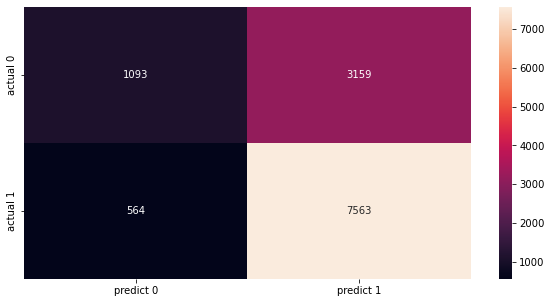

In [118]:
cm_matrix(y_test_logit,y_pred_logit)

In [119]:
def roc(y,x):
    plt.figure(figsize=(10,5))
    fpr,tpr,thresold=roc_curve(y,x)
    # plot ROC curve
    plt.plot(fpr,tpr)

    # SET LIMITS FOR X AND Y AXES
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])

    # plot the straight line showing warst prediction for the model
    plt.plot([0,1],[0,1],'r--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')


    auc=round(roc_auc_score(y,x),4)
    plt.text(x=0.6,y=0.5,s=('AUC Score',auc))

    plt.grid(True)
    plt.show()

    print(thresold)

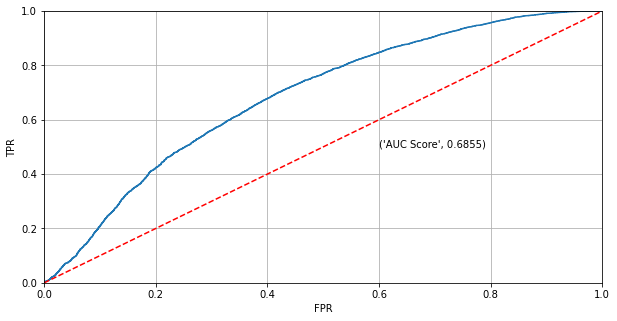

[1.94451729 0.94451729 0.92462066 ... 0.13934796 0.13857733 0.01519858]


In [120]:
roc(y_test_logit,y_pred_prob_logit)

In [121]:
def summary(x,y):
    cm=confusion_matrix(x,y)
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    TP=cm[1][1]

    ACCURACY=(TP+TN)/(TP+TN+FP+FN)
    ACCURACY

    PRECISION=TP/(TP+FP)
    PRECISION

    RECALL=TP/(TP+FN)
    RECALL

    SPECIFICITY=TN/(TN+FP)
    SPECIFICITY

    FPR=1-SPECIFICITY
    FPR

    F1_SCORE=2*((PRECISION*RECALL)/(PRECISION+RECALL))
    F1_SCORE

    print('accuracy: ', ACCURACY)
    print('precision: ', PRECISION)
    print('recall: ', RECALL)
    print('specificity: ',SPECIFICITY)
    print('fpr: ', FPR)
    print('F1-specificity: ', F1_SCORE)

In [122]:
summary(y_test_logit,y_pred_logit)

accuracy:  0.6992487276839809
precision:  0.7053721320649132
recall:  0.9306016980435585
specificity:  0.2570555032925682
fpr:  0.7429444967074318
F1-specificity:  0.8024828903390101


## LOGISTIC REGRESSION MODEL....

In [123]:
xb_lr=df_fact_1.drop(['address','name','online_order','reviews_list','menu_item'],axis=1)
yb_lr=df_fact_1['online_order']

#xbc_1=sm.add_constant(xb_1)

x_train_lr,x_test_lr,y_train_lr,y_test_lr=train_test_split(xb_lr,yb_lr,test_size=0.3,random_state=100)

print('x_train: ',x_train_lr.shape)
print('x_test: ',x_test_lr.shape)
print('y_train: ',y_train_lr.shape)
print('y_test: ',y_test_lr.shape)

x_train:  (28884, 9)
x_test:  (12379, 9)
y_train:  (28884,)
y_test:  (12379,)


In [124]:
LR1=LogisticRegression(random_state=0)
LR1.fit(x_train_lr,y_train_lr)
y_pred_LR1=LR1.predict(x_test_lr)
y_pred_prob_LR1=LR1.predict_proba(x_test_lr)
print(y_pred_LR1[:51])

[1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


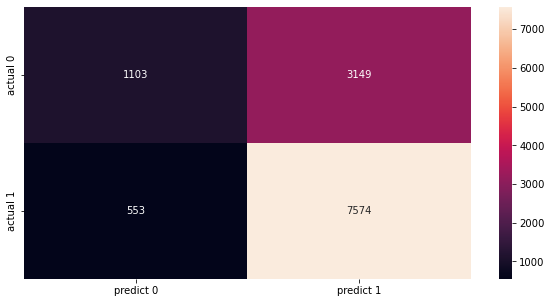

In [125]:
cm_matrix(y_test_lr,y_pred_LR1)

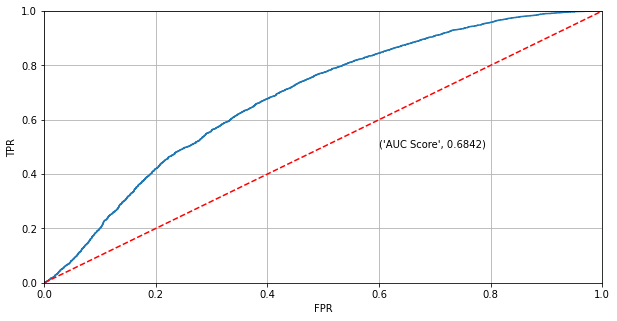

[1.9540147  0.9540147  0.93525134 ... 0.12914286 0.12738651 0.01716898]


In [126]:
roc(y_test_lr,y_pred_prob_LR1[:,1])

In [127]:
summary(y_test_lr,y_pred_LR1)

accuracy:  0.7009451490427336
precision:  0.7063321831576984
recall:  0.9319552110249785
specificity:  0.2594073377234243
fpr:  0.7405926622765757
F1-specificity:  0.803607427055703


## DECISION TREE.....

In [128]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [2,5,8],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [3,6,9],
                     'min_samples_leaf': [4,6,7],
                     'max_leaf_nodes': [3,5,7]}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)  

## cv-->cross_validation

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train_lr, y_train_lr)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 3} 



In [129]:
decision_tree_classificaton=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=5,max_features='sqrt',max_leaf_nodes=7,min_samples_leaf=4,min_samples_split=3)

decision_tree=decision_tree_classificaton.fit(x_train_lr,y_train_lr)
decision_tree_classificaton

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=7, min_samples_leaf=4,
                       min_samples_split=3, random_state=10)

In [130]:
train_pred_dt=decision_tree.predict(x_train_lr)
print(classification_report(y_train_lr,train_pred_dt))

              precision    recall  f1-score   support

           0       0.63      0.33      0.43      9909
           1       0.72      0.90      0.80     18975

    accuracy                           0.70     28884
   macro avg       0.67      0.61      0.61     28884
weighted avg       0.69      0.70      0.67     28884



In [131]:
test_pred_dt=decision_tree.predict(x_test_lr)
print(classification_report(y_test_lr,test_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.32      0.43      4252
           1       0.72      0.90      0.80      8127

    accuracy                           0.70     12379
   macro avg       0.67      0.61      0.61     12379
weighted avg       0.69      0.70      0.67     12379



## random forest.....

In [132]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'n_estimators': range(5,11)}]

random_forest = RandomForestClassifier(random_state=10)

forest_grid = GridSearchCV(estimator = random_forest, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
forest_grid_model = forest_grid.fit(x_train_lr, y_train_lr)

# get the best parameters
print('Best parameters for decision tree classifier: ', forest_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 10} 



In [133]:
rf_classification=RandomForestClassifier(n_estimators=10,random_state=15,max_depth=9,criterion='gini')

# use fit() to fit the model on the train set

rf_model=rf_classification.fit(x_train_lr,y_train_lr)

In [134]:
train_pred=rf_model.predict(x_train_lr)

# retun the performance measure on train set
print(classification_report(y_train_lr,train_pred))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67      9909
           1       0.80      0.95      0.87     18975

    accuracy                           0.81     28884
   macro avg       0.83      0.75      0.77     28884
weighted avg       0.82      0.81      0.80     28884



In [135]:
test_pred=rf_model.predict(x_test_lr)

# retun the performance measure on train set
print(classification_report(y_test_lr,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.52      0.63      4252
           1       0.79      0.94      0.86      8127

    accuracy                           0.79     12379
   macro avg       0.80      0.73      0.75     12379
weighted avg       0.80      0.79      0.78     12379



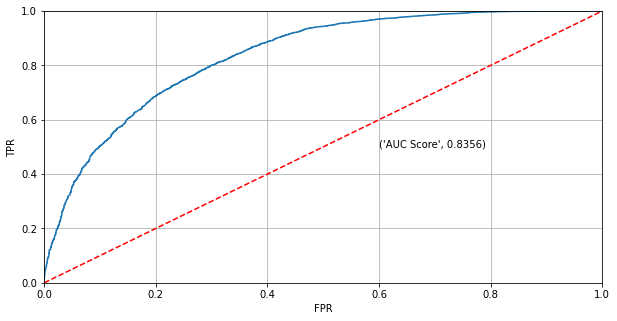

[1.95647731e+00 9.56477306e-01 9.40739795e-01 ... 1.80661474e-03
 9.21658986e-04 0.00000000e+00]


In [136]:
y_pred_prob_rf=rf_model.predict_proba(x_test_lr)
roc(y_test_lr,y_pred_prob_rf[:,1])

## important feature...

In [137]:
important_feature=pd.DataFrame({'features':x_train_lr.columns,
                               'Importance':rf_model.feature_importances_})

important_features=important_feature.sort_values(by='Importance',ascending=False)


<AxesSubplot:xlabel='Importance', ylabel='features'>

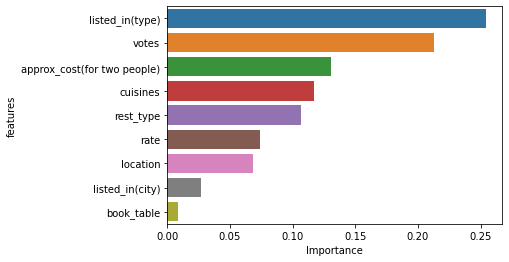

In [138]:
sns.barplot(data=important_features,x='Importance',y='features')

## visualization.....

In [139]:
df_fact.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,1,1,4.1,775,0,0,0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,1,0,4.1,787,0,0,1,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,0


In [140]:
df_vis=df.copy()

In [141]:
def rate(x):
    if 0<=x<=1:
        return 'Rate 1'
    if 1<x<=2:
        return 'Rate 2'
    if 2<=x<3:
        return 'Rate 3'
    if 3<=x<4:
        return 'Rate 4'
    if 4<=x<=5:
        return 'Rate 5'

In [142]:
df_vis['rating']=df_vis['rate'].apply(rate)
df_vis['rating'].isnull().sum()

0

### online order available or not

In [143]:
df_fact['online_order'].value_counts()

1    27102
0    14161
Name: online_order, dtype: int64

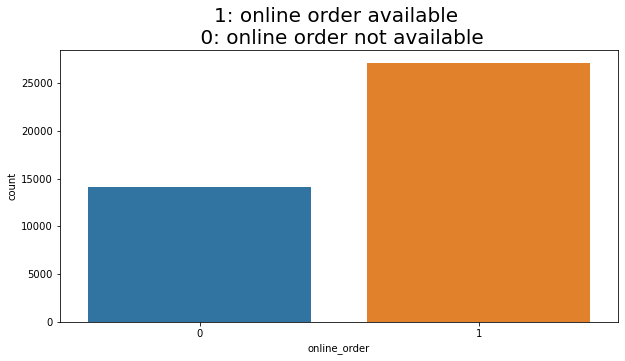

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(df_fact['online_order'])
plt.title('1: online order available \n 0: online order not available',fontsize=20)
plt.show()

### book the table or not...

In [145]:
df_fact['online_order'].value_counts()

1    27102
0    14161
Name: online_order, dtype: int64

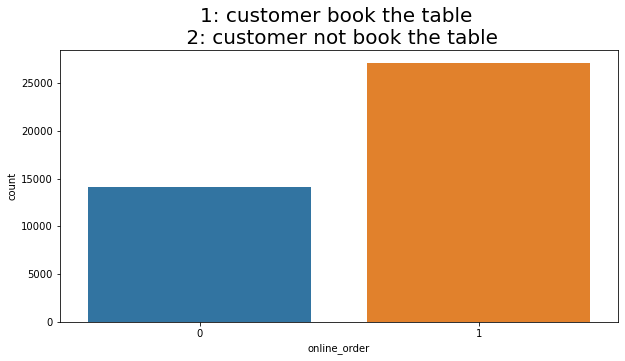

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(df_fact['online_order'])
plt.title('1: customer book the table \n 2: customer not book the table',fontsize=20)
plt.show()

In [147]:
df_fact.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [148]:
df_vis[['rest_type_1','rest_type_2']]=df_vis['rest_type'].str.split(',',expand=True)

In [149]:
df_vis

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating,rest_type_1,rest_type_2
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,1,1,4.1,775,Banashankari,casualdining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Rate 5,casualdining,None
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,1,0,4.1,787,Banashankari,casualdining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Rate 5,casualdining,None
2,"1112, Next to KIMS Medical College, 17th Cross...",san churro cafe,1,0,3.8,918,Banashankari,"cafe,casualdining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Rate 4,cafe,casualdining
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",addhuri udupi bhojana,0,0,3.7,88,Banashankari,quickbites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Rate 4,quickbites,None
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",grand village,0,0,3.8,166,Basavanagudi,casualdining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Rate 4,casualdining,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43528,"136, SAP Labs India, KIADB Export Promotion In...",the farm house bar n grill,0,0,3.7,34,Whitefield,"casualdining,bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,Rate 4,casualdining,bar
43529,"139/C1, Next To GR Tech Park, Pattandur Agraha...",bhagini,0,0,2.5,81,Whitefield,"casualdining,bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,Rate 3,casualdining,bar
43530,"Four Points by Sheraton Bengaluru, 43/3, White...",best brews - four points by sheraton bengaluru...,0,0,3.6,27,Whitefield,bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,Rate 4,bar,None
43531,Sheraton Grand Bengaluru Whitefield Hotel & Co...,chime - sheraton grand bengaluru whitefield ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Rate 5,bar,None


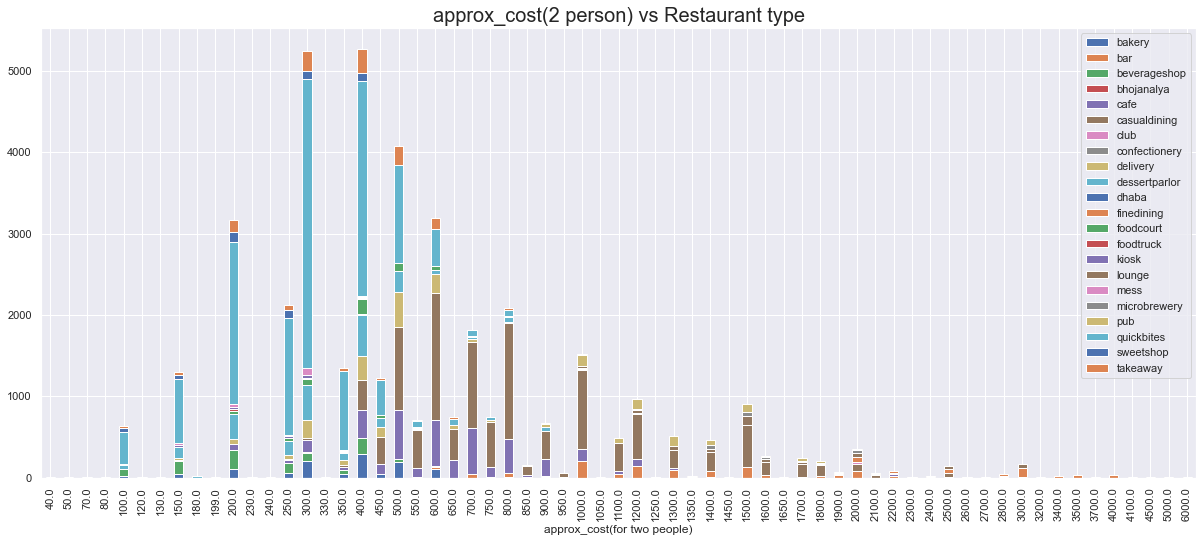

In [157]:
#plt.figure(figsize=(10,10))
x=pd.crosstab(df_vis['approx_cost(for two people)'],df_vis['rest_type_1'])
x.plot(kind='bar',stacked=True)
sns.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('approx_cost(2 person) vs Restaurant type',fontsize=20)
plt.legend()

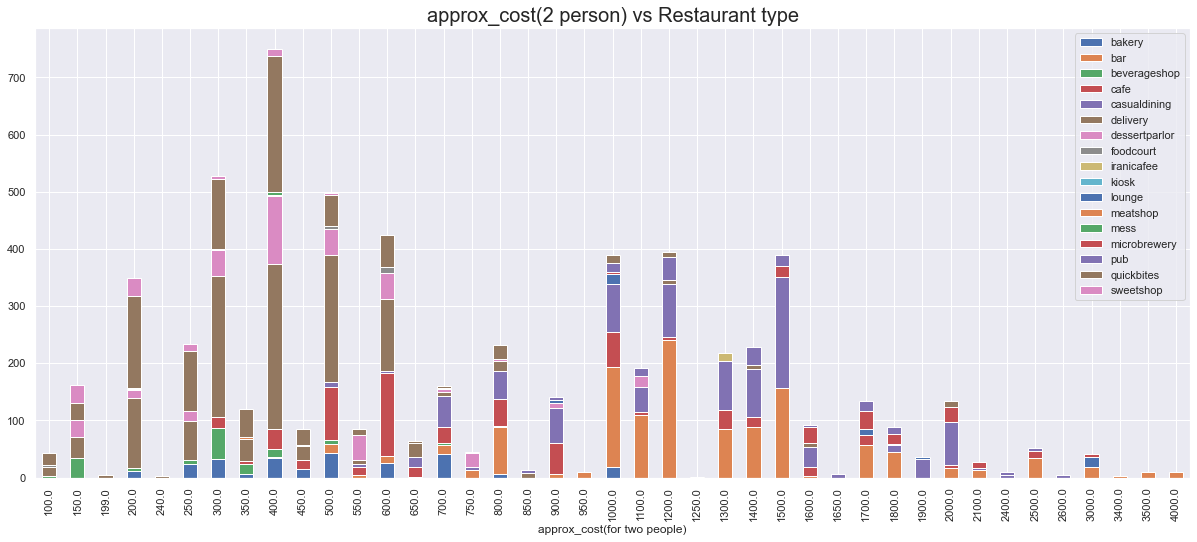

In [151]:
#plt.figure(figsize=(10,10))
x=pd.crosstab(df_vis['approx_cost(for two people)'],df_vis['rest_type_2'])
x.plot(kind='bar',stacked=True)
sns.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('approx_cost(2 person) vs Restaurant type',fontsize=20)
plt.legend()

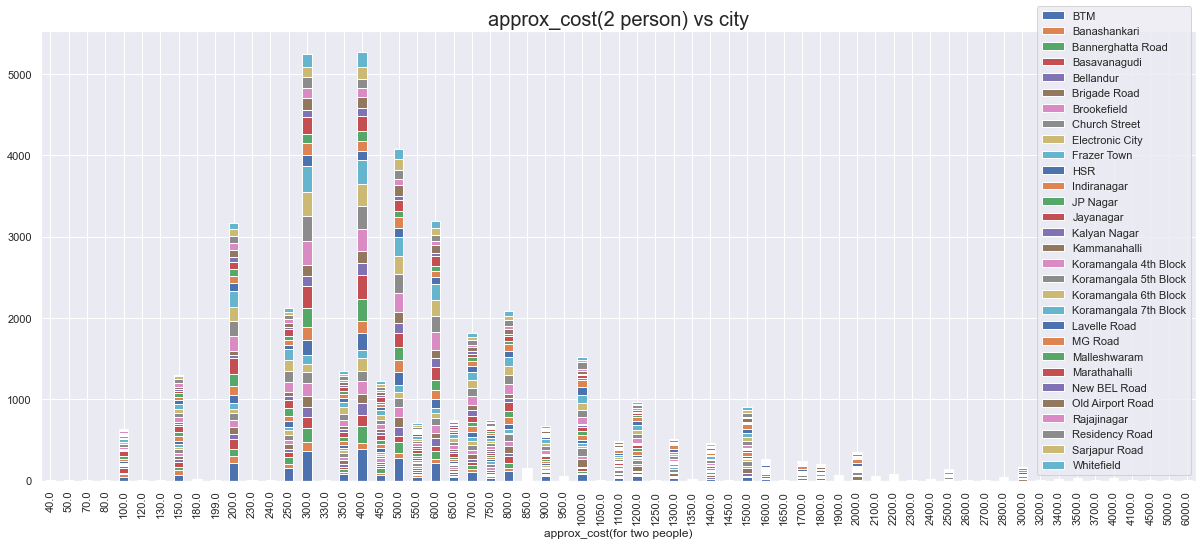

In [152]:
x=pd.crosstab(df_vis['approx_cost(for two people)'],df_vis['listed_in(city)'])
x.plot(kind='bar',stacked=True)
sns.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('approx_cost(2 person) vs city',fontsize=20)
plt.legend()

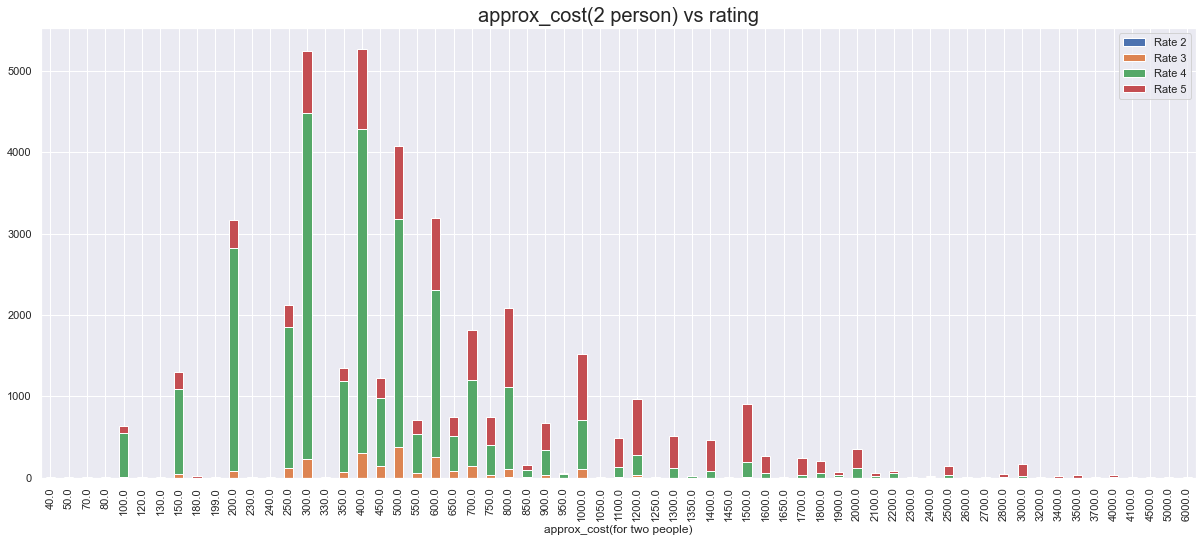

In [153]:
x=pd.crosstab(df_vis['approx_cost(for two people)'],df_vis['rating'])
x.plot(kind='bar',stacked=True)
sns.set(rc={'figure.figsize':(20.7,8.27)})
plt.title('approx_cost(2 person) vs rating',fontsize=20)
plt.legend()

## top restaurant......

In [154]:
top_15=df_vis.name.value_counts()[:15]

Text(0.5, 1.0, 'Top 15 restaurant')

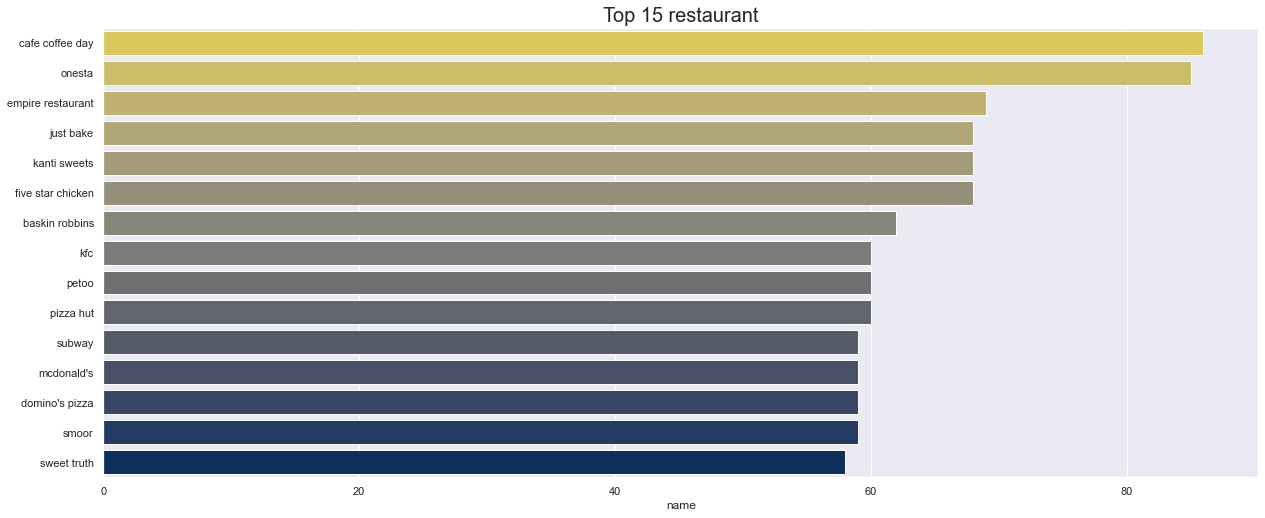

In [155]:
sns.barplot(x=top_15,y=top_15.index,palette='cividis_r')
plt.title('Top 15 restaurant',fontsize=20)


## THANK YOU....